In [1]:
#include <iostream>
#include <algorithm>
#include <cmath>
#include <vector>
#include "../include/MSc_projects_gnuplot.hpp"
#include "xeus/xjson.hpp"


In [2]:
.L ../lib/libMSc_Math_Finance_2018LIB.so

In [3]:
// ONLY RUN THIS CELL ONCE AT THE START
// allow for figures to be plotted
xeus::xjson mime_bundle_repr(const MSC_PROJECTS::gnuplotImage& i)
{
    auto bundle = xeus::xjson::object();
    bundle["image/png"] = MSC_PROJECTS::encode64(i.imageText);
    return bundle;
}
// gnuplot functions
MSC_PROJECTS::GnuplotWidget G;
MSC_PROJECTS::gnuplotImage figure1;
// storage for plots
std::vector<double> x;
std::vector<double> y;
std::vector<std::vector<double>> z;

In [4]:
// return the intesity process lambda for a given price (inverse of the price function)
double lambdaIntensity(double price,double a,double alpha)
{
  return a*exp(-alpha*price);
}

In [5]:
// return the price we are selling at if the current sales intensity is lambda (inverse of the intensity function)
double priceFunction(double lambda,double a,double alpha)
{
  return -1/alpha*log(lambda/a);
}

In [6]:
// Ns is the number of stock units that may be sold
  int Ns;
  // parameters for the pricing function
  double a,alpha;
  
  // number of timesteps
  int K;
  // length of time T in which we can sell units
  double T,dt;
  // create storage to track the optimal sales policy p and value function J
  // assume here that J(n,t) = J(n,t^j) = J_n^j
  // in code J[n][j] ~~ J_n^j
  std::vector<std::vector<double> > Jvalue,optimalPvalue;
  
  double pStar;

In [7]:
// Ns is the number of stock units that may be sold
Ns=25;
// parameters for the pricing function
a=40.;alpha=1.;
  
// number of timesteps
K=100;
// length of time T in which we can sell units
T=1.;
// grid variables
dt = T/K;
  
Jvalue.resize(Ns+1,std::vector<double> (K+1));
optimalPvalue.resize(Ns+1,std::vector<double> (K+1));
  
pStar=1.;

In [8]:
// assign boundary conditions
  // J(n,T)=0
  for(int n=0;n<=Ns;n++)
  {
    Jvalue[n][K]=0.;
  }
  
  // J(0,t)=0
  for(int j=0;j<=K;j++)
  {
    Jvalue[0][j]=0.;
  }
// assume that selling price is fixed p=1, we solve backwards in time so that
  //
  //  dJ/dt - lambda(p) ( J(n,t+dt)-J(n-1,t+dt) ) + p lambda(p) = 0
  // and in finite differences we have
  //  ( J(n,t+dt) - J(n,t) )/dt - lambda(p) ( J(n,t+dt)-J(n-1,t+dt) ) + p lambda(p) = 0
  // then we can write
  //      J(n,t) = ( 1 - lambda(p) dt ) J(n,t+dt) + ( lambda(p) dt ) J(n-1,t+dt) + p lambda(p)
  //      J_n^j = ( 1 - lambda(p) dt ) J_n^{j+1} + ( lambda(p) dt ) J_{n-1}^{j+1} + p lambda(p)
  // notice the similarity to binomial tree pricing formula, except q=lambda(p) dt is the probability
  //
  // At each time step, calculate the Jvalue
  for(int j=K-1;j>=0;j--)
  {
    for(int n=1;n<=Ns;n++)
    {
      Jvalue[n][j]=(1.- lambdaIntensity(pStar,a,alpha)*dt) * Jvalue[n][j+1] + lambdaIntensity(pStar,a,alpha)*dt * Jvalue[n-1][j+1] + pStar * lambdaIntensity(pStar,a,alpha) * dt;
    }
  }

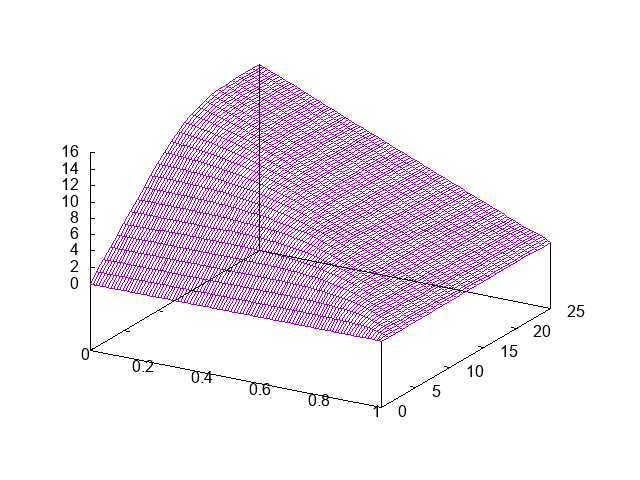

In [12]:
x.resize(Ns+1);
for(int n=0;n<=Ns;n++)
{
    x[n] = n;
}
y.resize(K+1);
for(int j=0;j<=K;j++)
{
    y[j]= j*dt;
}
// plot the figure
{
    // add labels on the x/y axis
    std::stringstream ss("set view 120,60");
    // put the plot in figure1
    figure1 = G.plotData3D(x,y,Jvalue,&ss);
}
// show figure
figure1